# 케라스 3장

In [174]:
from keras import layers

In [175]:
# 첫번째 차원이 784인 2d텐서만 입력으로 받는 층을 만듬
layer = layers.Dense(32, input_shape=(784,))

In [176]:
#케라스는 모델에 추가된 층을 자동으로 상위층에 크기에 맞춰줌 예를들어
from keras import models
from keras import layers
model=models.Sequential()
model.add(layers.Dense(32, input_shape=(784,)))
model.add(layers.Dense(10))

# 케라스에서 모델만들기 2가지

In [177]:
from keras import layers
from keras import models

In [178]:
model=models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape(784,)))
model.add(layers.Dense(10, activation='softmax'))

SyntaxError: positional argument follows keyword argument (<ipython-input-178-adfebba814f1>, line 2)

In [179]:
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)
model = models.Model(inputs=input_tensor, outputs=output_tensor)

In [180]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='mse',
             metrics=['accuracy'])

In [181]:
model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)
#target_tensor가 만들어져있지 않으므로 돌아가지않음


NameError: name 'target_tensor' is not defined

# 영화리뷰분류 : 이진 분류 예제

In [182]:
#데이터셋 로드
from keras.datasets import imdb
(train_data, train_labels), (test_data,test_labels) = imdb.load_data(
num_words=10000)

#num_words =10000은 가장 자주나오는 데이터 10000개만 사용하겠다는 뜻이다.
#전체는 training 25000 test 25000 으로 구성되있다 긍정 50% 부정 50%
#labels는 부정을 나타내는 0 긍정을 나타내는 1이다.

In [183]:
import numpy as np
x=train_labels
len(x)


25000

In [184]:
max([max(sequence) for sequence in train_data])

9999

In [185]:
train_data[1]
#0,1 은 각 리뷰전체를 말하는 것이고, 안의 숫자는 단어들을 숫자 인덱싱으로 인코딩 해놓은 것
#이를 쌓아놨기 때문에 차원은 1이다
np.ndim(x)

1

In [186]:
type(x)

numpy.ndarray

In [187]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [188]:
def abc(sequences, demension=10000):
    results = np.zeros((len(sequences), demension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] =1.
        return results
x_train = abc(train_data)
x_test = abc(test_data)
#배열 리스트를  신경망에 넣을 수 없기 때문에 원핫 인코딩으로 바꿔준다 =>벡터로 바꿔줌
#레이블은 바꾸기 쉬움
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [189]:
x_train[0]
#워드투벡 된 숫자들을 원핫 인코딩으로 바꿔준 것이다
#아래에 1,1 이 의 미하는 것은 2번째 3번째 해당 인덱스의 단어들이 문장에 포함됬다는 것을 의미한다.

array([0., 1., 1., ..., 0., 0., 0.])

In [190]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [191]:
len(x_train[0])
#자주 쓰이는 단어 10000개를 썻기 때문에 index로 바꿨을때 길이는 10000개가 된다

10000

In [91]:
#케라스 구현
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(100, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [92]:
from keras import optimizers
model.compile(optimizer='rmsprop',
             loss = 'mse',
             metrics=['acc'])

In [93]:
#검증 셋을 만들어야함
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [94]:
history=model.fit(x_train,
                 y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val, y_val))

Train on 25000 samples, validate on 10000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 127us/step - loss: 0.2500 - acc: 0.4956 - val_loss: 0.2500 - val_acc: 0.4948
Epoch 2/20
25000/25000 [==============================] - 3s 117us/step - loss: 0.2500 - acc: 0.4907 - val_loss: 0.2500 - val_acc: 0.4948
Epoch 3/20
25000/25000 [==============================] - 3s 117us/step - loss: 0.2500 - acc: 0.4940 - val_loss: 0.2500 - val_acc: 0.5053
Epoch 4/20
25000/25000 [==============================] - 3s 118us/step - loss: 0.2500 - acc: 0.4968 - val_loss: 0.2500 - val_acc: 0.5053
Epoch 5/20
25000/25000 [==============================] - 3s 118us/step - loss: 0.2500 - acc: 0.4968 - val_loss: 0.2500 - val_acc: 0.4948
Epoch 6/20
25000/25000 [==============================] - 3s 119us/step - loss: 0.2500 - acc: 0.5002 - val_loss: 0.2500 - val_acc: 0.4948
Epoch 7/20
25000/25000 [==============================] - 3s 118us/step - loss: 0.2500 - acc: 0.4980 - val_loss: 0.2500 - 

In [74]:
history_dict = history.history

In [76]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

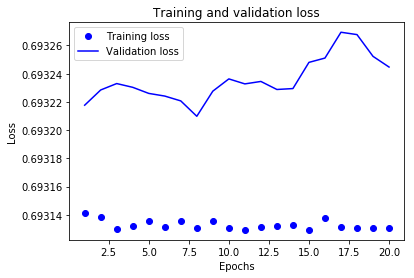

In [79]:
import matplotlib.pyplot as plt
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label= 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

No handles with labels found to put in legend.


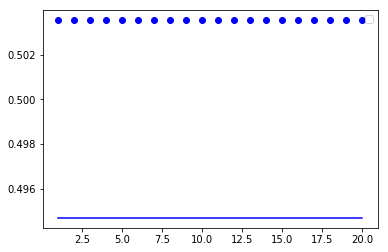

In [81]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo')
plt.plot(epochs, val_acc,'b')
plt.legend()
plt.show()

In [85]:
model.predict(x_test)

array([[0.48786265],
       [0.4962473 ],
       [0.4962473 ],
       ...,
       [0.4962473 ],
       [0.4962473 ],
       [0.4962473 ]], dtype=float32)

# 뉴스기사분류 : 다중 분류 문제

In [192]:
from keras.datasets import reuters
(train_data, train_labels), (test_data,test_labels) = reuters.load_data(
num_words=10000)


In [193]:
len(train_data)

8982

In [197]:
len(train_data[0])

87

In [195]:
len(train_data[0])

87

In [99]:
len(test_data)

2246

In [198]:
x_train = abc(train_data)
x_test = abc(test_data)

In [200]:
def bcd(labels, demension=46):
    results = np.zeros((len(labels), demension))
    for i, label in enumerate(labels):
        results[i, label] =1.
        return results
                
one_hot_train_labels = bcd(train_labels)
one_hot_test_labels = bcd(test_labels)
np.ndim(one_hot_test_labels)

2

In [199]:
x_train.shape

(8982, 10000)

In [151]:
one_hot_train_labels.shape

(8982, 46)

In [152]:
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [201]:
model=models.Sequential()
model.add(layers.Dense(64,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [202]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [203]:
#검증 셋을 만들어야함
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]


In [205]:
history=model.fit(x_train,
                 y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val, y_val))

ValueError: Error when checking target: expected dense_62 to have shape (46,) but got array with shape (1,)

# 주택 가격 예측 : 회귀 문제

In [1]:
#보스턴 외곽지역의 범죄율, 지방세율로 주택 가격의 중간 값 예측
from keras.datasets import boston_housing

C:\Users\korewa\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(train_data, train_targets),(test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 7us/step


In [8]:
import numpy as np
np.shape(train_data)
#train data 는 404의 obs에 13개의 변수를 가지고있다.

(404, 13)

In [10]:
#이번 데이터는 스케일이 각 변수마다 다르기 때문에  정규화를 해줘야한다.
mean=train_data.mean(axis=0)
train_data-=mean  #평균을 구해서 각 obs마다 평균치를 빼서 정규화 시키는 것으로 보임
std= train_data.std(axis=0)
train_data /= std
test_data-=mean
test_data /= std
#train test 둘다 mean을 빼주고 std로 나눠줌 

In [14]:
#train수가 작을 수록 과대 적합이 쉽게 일어난다
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                          input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop',
             loss='mse',
             metrics=['mae'])

    return model

In [22]:
#k fold cross validation으로 검증 셋을 나눈다. p130참조
num_val_samples = len(train_data)//4
num_epochs = 100
all_scores=[]
for i in range(4):
    print('처리중인 폴드 #',i)
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
             epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mse)
    

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [23]:
all_scores
#k수를 바꿀 때 마다 변화가 확실하게 느껴짐
#mae점수를 나타냄
#11달러나 차이 나는 것은 아직 크다
#spoch와 k수를 늘리면 차이는 더 줄어들 것이다.

[11.18286398377749, 9.55688482227892, 15.196286786900888, 12.572180313491586]

In [24]:
np.mean(all_scores)

12.12705397661222

In [25]:
#k fold cross validation으로 검증 셋을 나눈다. p130참조
num_val_samples = len(train_data)//4
num_epochs = 500
all_scores=[]
for i in range(4):
    print('처리중인 폴드 #',i)
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
             epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mse)
    

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [26]:
#실행해보니 k의 영향을 더 많이 받는 것 같다.
all_scores

[11.21023421712441, 35.28338032901877, 14.674925303695225, 12.841577135690368]